In [1]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.dates import date2num
import matplotlib.dates as mdates
from datetime import datetime
import xarray as xr
import netCDF4 as nc
import pandas as pd
import glob
import math
import subprocess
from matplotlib import colormaps

from matplotlib.colors import ListedColormap
import plotly.graph_objs as go

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import mplcursors  




/home/b/b382718/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


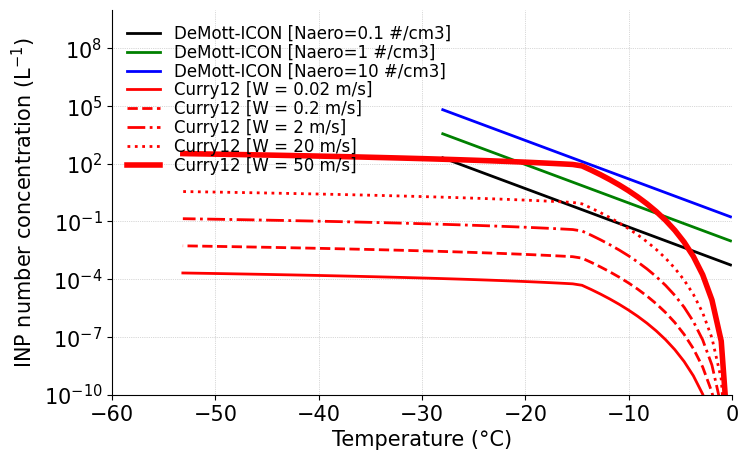

In [21]:



def inp_demott_icon(naero, tempk):
    alpha = 1.e3; beta = 1.25; gamma = 0.46; delta = -11.6; t0 = 273.15;
    Cw = 1.41;
    #w_in = 100.*w_in;      # m/s to cm/s
    
    n_in_perl = np.zeros_like(tempk)
    for i in range(len(tempk)):
        if tempk[i] > 245.:
            n_in_perl[i] = alpha*(naero**beta) * (np.exp(gamma*(t0-tempk[i]) + delta))    # original DeMott15 implemented in ICON
            #n_in_perl[i] = (w_in**Cw)*alpha*(naero**beta) * (np.exp(gamma*(t0-tempk[i]) + delta))
        else:
            n_in_perl[i] = np.nan
    return n_in_perl

def inp_demott_2015(naero, tempk):
    #alpha = -0.074; beta = 3.8; gamma = 0.414; delta = -9.671; # Tobo et al. 2013
    alpha = 0.; beta = 1.25; gamma = 0.46; delta = -11.6; # DeMott et al. 2015
    inp_demott_2015 = (naero)**(alpha*(273.16-tempk)+beta)
    inp_demott_2015 = inp_demott_2015 * np.exp(gamma*(273.16-tempk)+delta)
    return 1.e3*inp_demott_2015 # perl to perm3

def inp_curry12(w_in, tempk):
    tc_in = tempk-273.16;
    #w_in = 100.*w_in;      # m/s to cm/s  
    #naero_perl = naero*1.e3
    Cg_warm = 4.e-9; Tc0 = 0.; Ct_warm = 8.0; Cw = 1.41;
    Cg_cold = 0.535; Ct_cold = 1.05;

    n_in_perl = np.zeros_like(tempk)
    for i in range(len(tempk)):
        if tempk[i] > 258.:
            n_in_perl[i] = (Cg_warm*(Tc0-tc_in[i])**Ct_warm)*(w_in**Cw)
        else:
            n_in_perl[i] = (Cg_cold*(Tc0-tc_in[i])**Ct_cold)*(w_in**Cw)

    #fr_frac = n_in_perl/naero_perl
    return n_in_perl

tempk = np.linspace(273., 220., 60)
tempk = np.array(tempk)


w_in = np.linspace(0., 0.5, 60)

#print(inp_curry12(w_in, tempk))
naero1 = 0.1 # cm-3
naero2 = 1. # cm-3
naero3 = 10. # cm-3

fontsize=15;
lnwdth=2;
alpha=0.6;

plt.figure(figsize=(8, 5))
plt.plot(tempk-273.16, inp_demott_icon(naero1, tempk), 'k-', linewidth=lnwdth, label='DeMott-ICON [Naero=0.1 #/cm3]')
plt.plot(tempk-273.16, inp_demott_icon(naero2, tempk), 'g-', linewidth=lnwdth, label='DeMott-ICON [Naero=1 #/cm3]')
plt.plot(tempk-273.16, inp_demott_icon(naero3, tempk), 'b-', linewidth=lnwdth, label='DeMott-ICON [Naero=10 #/cm3]')

plt.plot(tempk-273.16, inp_curry12(2.e-4, tempk), 'r-', linewidth=lnwdth, label='Curry12 [W = 0.02 m/s]')
plt.plot(tempk-273.16, inp_curry12(2.e-3, tempk), 'r--', linewidth=lnwdth, label='Curry12 [W = 0.2 m/s]')
plt.plot(tempk-273.16, inp_curry12(0.02, tempk), 'r-.', linewidth=lnwdth, label='Curry12 [W = 2 m/s]')
plt.plot(tempk-273.16, inp_curry12(0.2, tempk), 'r:', linewidth=lnwdth, label='Curry12 [W = 20 m/s]')
plt.plot(tempk-273.16, inp_curry12(5., tempk), 'r-', linewidth=lnwdth+2, label='Curry12 [W = 50 m/s]')

plt.xlabel('Temperature (°C)', fontsize=fontsize)
plt.ylabel('INP number concentration (L$^{-1}$)', fontsize=fontsize)
plt.xlim(-60, 0)
plt.yscale('log')
plt.ylim(1.e-10, 1.e10)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize-3, loc='best')
plt.grid(True, linestyle=':', color='grey', linewidth=0.5, alpha=alpha)


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()